In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
import missingno
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
food_prices = pd.read_csv('E:\\OtherCodeProjects\\Springboard Capstone Projects\\Springboard-Capstone-2-Data\\global_food_prices_f.csv')

C:\Users\William\AppData\Local\Temp\ipykernel_11496\234402328.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  food_prices = pd.read_csv('E:\\OtherCodeProjects\\Springboard Capstone Projects\\Springboard-Capstone-2-Data\\global_food_prices_f.csv')


In [3]:
food_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_name,pt_id,pt_name,um_id,um_name,mp_price,date,days
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-01-01,16071
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-02-01,16102
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-03-01,16130
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-04-01,16161
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-05-01,16191


In [4]:
food_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 16 columns):
 #   Column     Dtype  
---  ------     -----  
 0   adm0_id    float64
 1   adm0_name  object 
 2   adm1_id    int64  
 3   adm1_name  object 
 4   mkt_id     int64  
 5   mkt_name   object 
 6   cm_id      int64  
 7   cm_name    object 
 8   cur_name   object 
 9   pt_id      int64  
 10  pt_name    object 
 11  um_id      int64  
 12  um_name    object 
 13  mp_price   float64
 14  date       object 
 15  days       int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 250.3+ MB


In [5]:
food_prices['date'] = pd.to_datetime(food_prices['date'])
food_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 16 columns):
 #   Column     Dtype         
---  ------     -----         
 0   adm0_id    float64       
 1   adm0_name  object        
 2   adm1_id    int64         
 3   adm1_name  object        
 4   mkt_id     int64         
 5   mkt_name   object        
 6   cm_id      int64         
 7   cm_name    object        
 8   cur_name   object        
 9   pt_id      int64         
 10  pt_name    object        
 11  um_id      int64         
 12  um_name    object        
 13  mp_price   float64       
 14  date       datetime64[ns]
 15  days       int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 250.3+ MB


In [6]:
NE_prices = food_prices[food_prices['adm0_name']=='Niger']
NE_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_name,pt_id,pt_name,um_id,um_name,mp_price,date,days
1246755,181.0,Niger,2202,Agadez,545,Aderbissinat,51,Maize - Retail,XOF,15,Retail,5,KG,189.0,2008-02-01,13910
1246756,181.0,Niger,2202,Agadez,545,Aderbissinat,51,Maize - Retail,XOF,15,Retail,5,KG,218.0,2008-04-01,13970
1246757,181.0,Niger,2202,Agadez,545,Aderbissinat,51,Maize - Retail,XOF,15,Retail,5,KG,280.0,2008-05-01,14000
1246758,181.0,Niger,2202,Agadez,545,Aderbissinat,51,Maize - Retail,XOF,15,Retail,5,KG,288.0,2008-09-01,14123
1246759,181.0,Niger,2202,Agadez,545,Aderbissinat,51,Maize - Retail,XOF,15,Retail,5,KG,259.0,2008-10-01,14153


In [7]:
NE_prices2 = NE_prices.pivot_table(values='mp_price',
                                    index=['adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'date', 'days'],
                                    columns=['cm_name'])
                                
NE_prices2.head()

cm_name                                                 Beans (niebe) - Retail  \
adm1_id adm1_name mkt_id mkt_name     date       days                            
2202    Agadez    545    Aderbissinat 2008-01-01 13879                   124.0   
                                      2008-02-01 13910                   180.0   
                                      2008-03-01 13939                   216.0   
                                      2008-04-01 13970                   239.0   
                                      2008-05-01 14000                   253.0   

cm_name                                                 Maize - Retail  \
adm1_id adm1_name mkt_id mkt_name     date       days                    
2202    Agadez    545    Aderbissinat 2008-01-01 13879             NaN   
                                      2008-02-01 13910           189.0   
                                      2008-03-01 13939             NaN   
                                      2008-04-01 13970           218.0   
                                      2008-05-01 14000           280.0   

cm_name                                                 Millet - Retail  \
adm1_id adm1_name mkt_id mkt_name     date       days                     
2202    Agadez    545    Aderbissinat 2008-01-01 13879            122.0   
                                      2008-02-01 13910            148.0   
                                      2008-03-01 13939            158.0   
                                      2008-04-01 13970            157.0   
                                      2008-05-01 14000            155.0   

cm_name                                                 Millet - Wholesale  \
adm1_id adm1_name mkt_id mkt_name     date       days                        
2202    Agadez    545    Aderbissinat 2008-01-01 13879                 NaN   
                                      2008-02-01 13910                 NaN   
                                      2008-03-01 13939                 NaN   
                                      2008-04-01 13970                 NaN   
                                      2008-05-01 14000                 NaN   

cm_name                                                 Rice (imported) - Retail  \
adm1_id adm1_name mkt_id mkt_name     date       days                              
2202    Agadez    545    Aderbissinat 2008-01-01 13879                     400.0   
                                      2008-02-01 13910                     400.0   
                                      2008-03-01 13939                     425.0   
                                      2008-04-01 13970                     400.0   
                                      2008-05-01 14000                     400.0   

cm_name                                                 Rice (imported) - Wholesale  \
adm1_id adm1_name mkt_id mkt_name     date       days                                 
2202    Agadez    545    Aderbissinat 2008-01-01 13879                          NaN   
                                      2008-02-01 13910                          NaN   
                                      2008-03-01 13939                          NaN   
                                      2008-04-01 13970                          NaN   
                                      2008-05-01 14000                          NaN   

cm_name                                                 Rice (local) - Retail  \
adm1_id adm1_name mkt_id mkt_name     date       days                           
2202    Agadez    545    Aderbissinat 2008-01-01 13879                    NaN   
                                      2008-02-01 13910                    NaN   
                                      2008-03-01 13939                    NaN   
                                      2008-04-01 13970                    NaN   
                                      2008-05-01 14000                    NaN   

cm_name                                                 Sorghum (l

In [8]:
for cm in NE_prices.cm_name.unique():
    print(cm)

Maize - Retail
Rice (imported) - Retail
Sorghum - Retail
Millet - Retail
Beans (niebe) - Retail
Rice (imported) - Wholesale
Millet - Wholesale
Wheat - Retail
Sorghum (local) - Wholesale
Rice (local) - Retail


In [9]:
def create_avg_cm_df(initial_df):
    
    count = 0
    for cm_name in initial_df.cm_name.unique():

        df_avg = initial_df[initial_df['cm_name']==cm_name]
        df_avg = df_avg[['date', 'mp_price', 'days']]
        df_avg = df_avg.groupby(by='date').mean()
        df_avg.reset_index(inplace=True)
        df_avg['cm_name'] = cm_name
        df_avg = df_avg.pivot_table(values='mp_price', index=['date', 'days'], columns='cm_name')
        df_avg.reset_index(inplace=True)

        if count == 0:
            df_new = df_avg
        else:
            df_new = pd.merge(left=df_new, right=df_avg, on=['days', 'date'], how='outer')

        count += 1

    df_new.sort_values(by='days', inplace=True)
    df_new.reset_index(inplace=True, drop=True)
    #df_new.set_index('days', verify_integrity=True, inplace=True)
    return df_new

In [10]:
NE_prices_avg = create_avg_cm_df(NE_prices)
NE_prices_avg.head()

cm_name,date,days,Maize - Retail,Rice (imported) - Retail,Sorghum - Retail,Millet - Retail,Beans (niebe) - Retail,Rice (imported) - Wholesale,Millet - Wholesale,Wheat - Retail,Sorghum (local) - Wholesale,Rice (local) - Retail
0,1990-01-01,7305.0,NaN,201.666667,57.750000,61.00,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02-01,7336.0,NaN,201.666667,54.250000,63.40,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03-01,7364.0,NaN,201.666667,54.750000,65.20,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04-01,7395.0,NaN,202.333333,55.500000,69.60,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05-01,7425.0,NaN,202.333333,49.666667,63.25,NaN,NaN,NaN,NaN,NaN,NaN


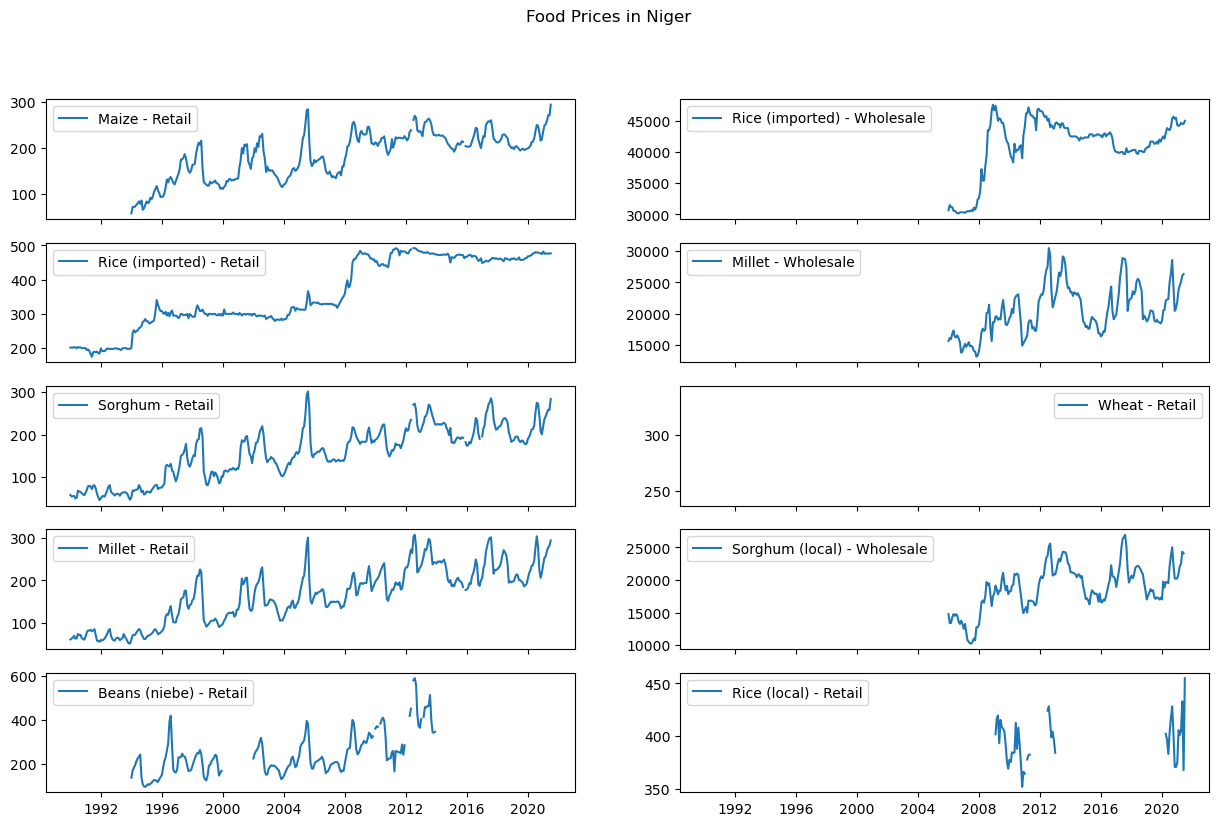

In [11]:
fig, ax = plt.subplots(5, 2, sharex=True)

fig.set_size_inches(15, 9)

ax[0,0].plot(NE_prices_avg.date, NE_prices_avg['Maize - Retail'], label='Maize - Retail')
ax[0,0].legend()
ax[1,0].plot(NE_prices_avg.date, NE_prices_avg['Rice (imported) - Retail'], label='Rice (imported) - Retail')
ax[1,0].legend()
ax[2,0].plot(NE_prices_avg.date, NE_prices_avg['Sorghum - Retail'], label='Sorghum - Retail')
ax[2,0].legend()
ax[3,0].plot(NE_prices_avg.date, NE_prices_avg['Millet - Retail'], label='Millet - Retail')
ax[3,0].legend()
ax[4,0].plot(NE_prices_avg.date, NE_prices_avg['Beans (niebe) - Retail'], label='Beans (niebe) - Retail')
ax[4,0].legend()
ax[0,1].plot(NE_prices_avg.date, NE_prices_avg['Rice (imported) - Wholesale'], label='Rice (imported) - Wholesale')
ax[0,1].legend()
ax[1,1].plot(NE_prices_avg.date, NE_prices_avg['Millet - Wholesale'], label='Millet - Wholesale')
ax[1,1].legend()
ax[2,1].plot(NE_prices_avg.date, NE_prices_avg['Wheat - Retail'], label='Wheat - Retail')
ax[2,1].legend()
ax[3,1].plot(NE_prices_avg.date, NE_prices_avg['Sorghum (local) - Wholesale'], label='Sorghum (local) - Wholesale')
ax[3,1].legend()
ax[4,1].plot(NE_prices_avg.date, NE_prices_avg['Rice (local) - Retail'], label='Rice (local) - Retail')
ax[4,1].legend()

plt.suptitle('Food Prices in Niger')
plt.show()

<AxesSubplot:xlabel='date'>

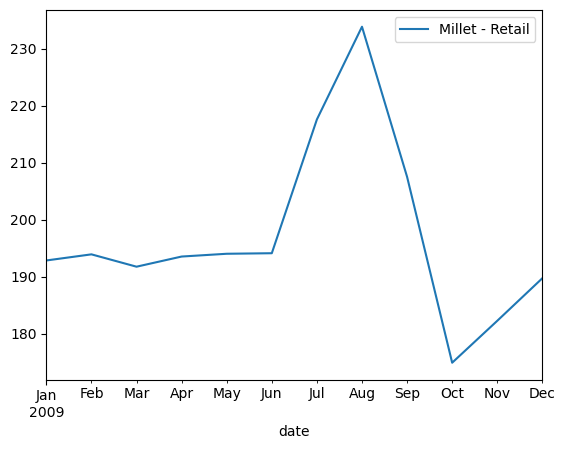

In [12]:
NE_Millet_avg_2009 = NE_prices_avg[NE_prices_avg['date'].dt.year == 2009]
NE_Millet_avg_2009.plot(x='date', y='Millet - Retail')

In [13]:
NE_prices_avg.drop(axis=1, labels=['Rice (imported) - Wholesale', 'Millet - Wholesale', 'Wheat - Retail', 'Sorghum (local) - Wholesale', 'Rice (local) - Retail'],\
                    inplace=True)
NE_prices_avg.head()

cm_name,date,days,Maize - Retail,Rice (imported) - Retail,Sorghum - Retail,Millet - Retail,Beans (niebe) - Retail
0,1990-01-01,7305.0,NaN,201.666667,57.750000,61.00,NaN
1,1990-02-01,7336.0,NaN,201.666667,54.250000,63.40,NaN
2,1990-03-01,7364.0,NaN,201.666667,54.750000,65.20,NaN
3,1990-04-01,7395.0,NaN,202.333333,55.500000,69.60,NaN
4,1990-05-01,7425.0,NaN,202.333333,49.666667,63.25,NaN


<AxesSubplot:>

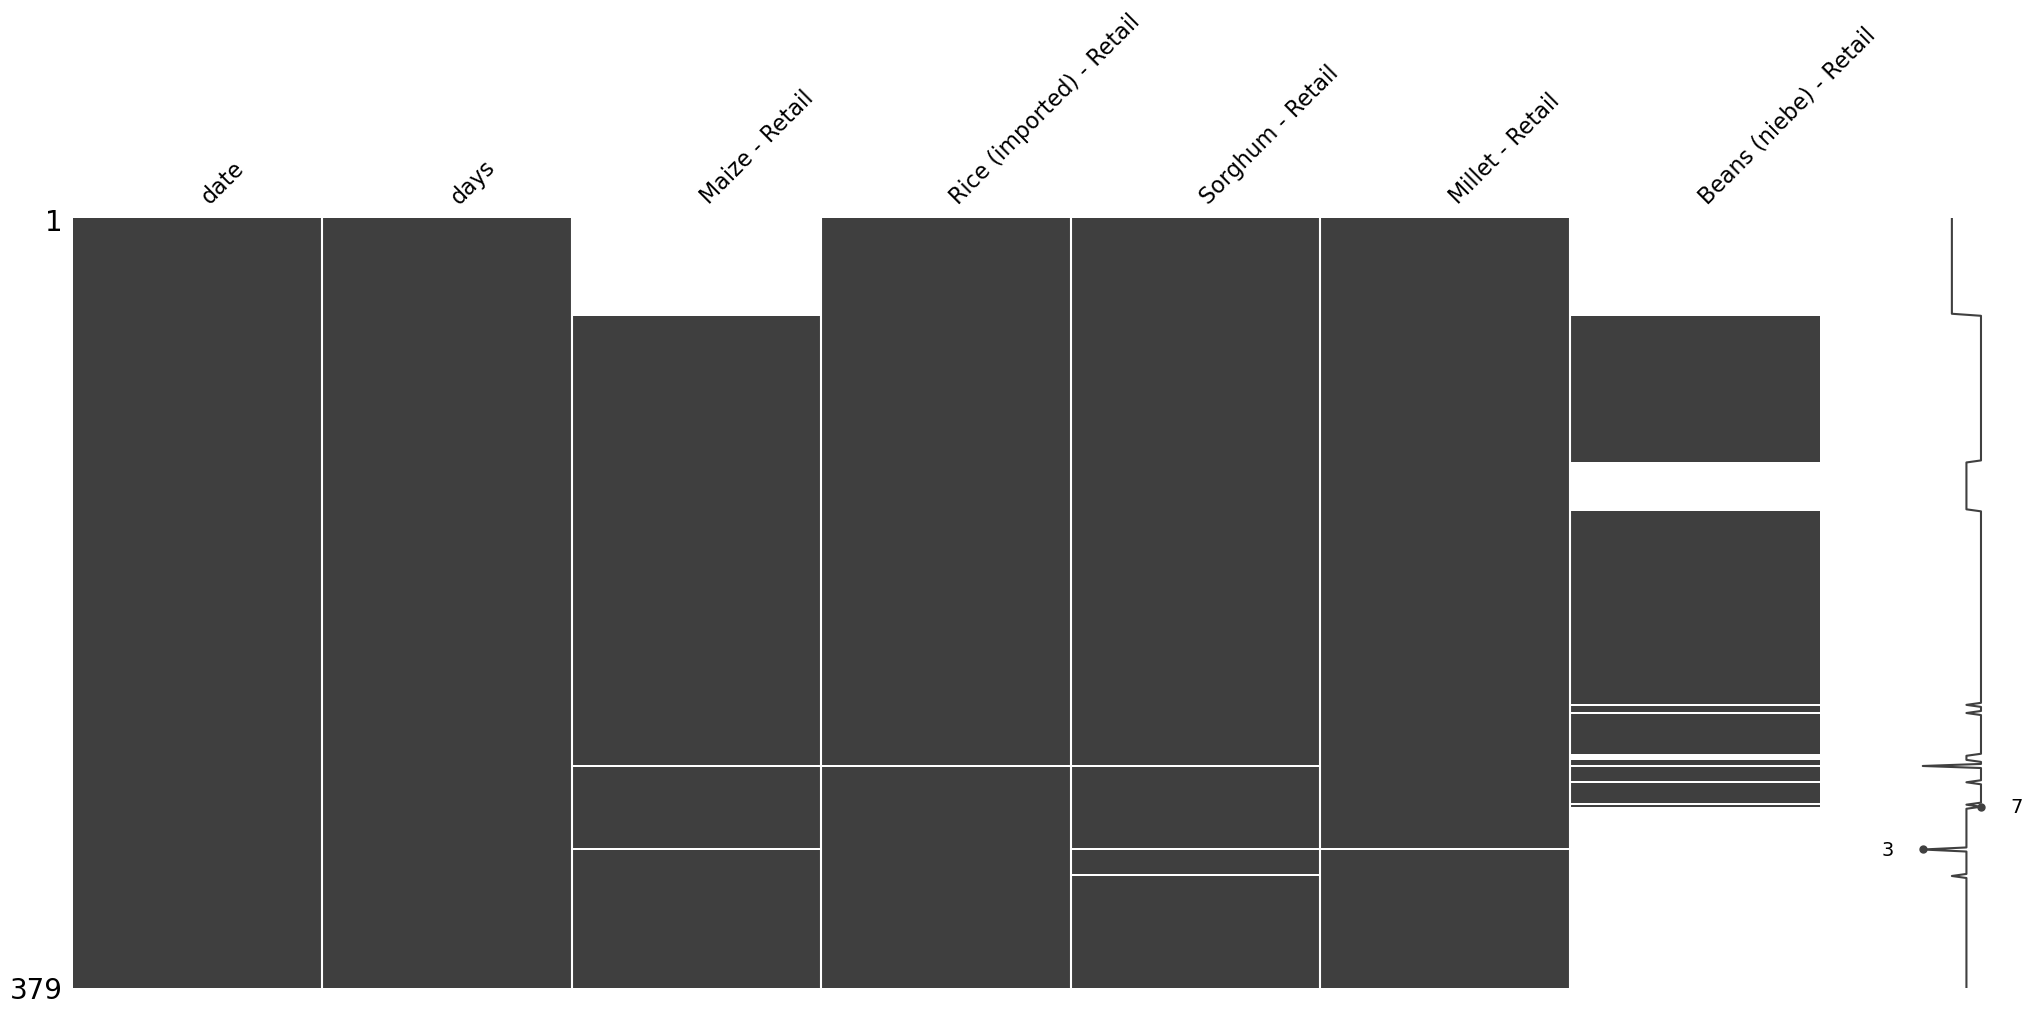

In [14]:
missingno.matrix(NE_prices_avg)

<AxesSubplot:>

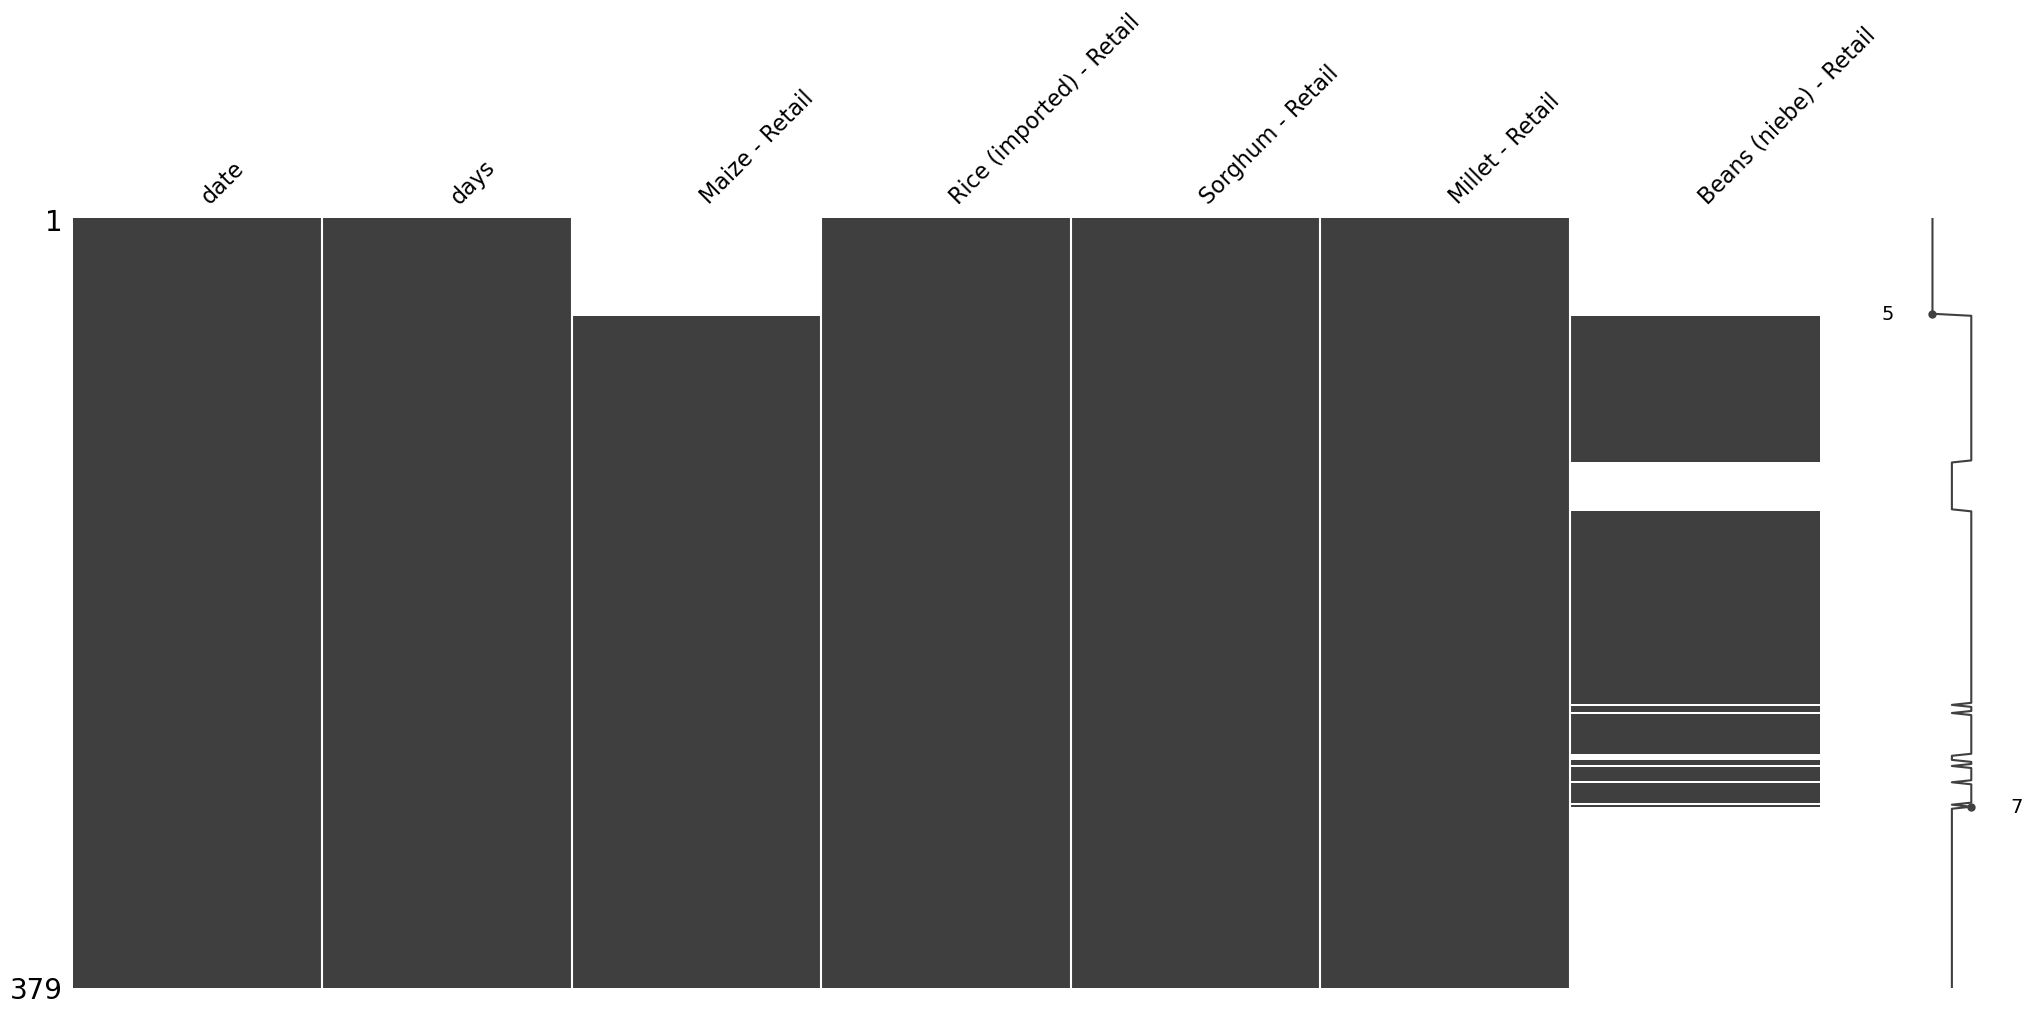

In [15]:
to_interpolate = ['Millet - Retail', 'Sorghum - Retail', 'Rice (imported) - Retail', 'Maize - Retail']
NE_prices_avg[to_interpolate] = NE_prices_avg[to_interpolate].interpolate(method='linear')

missingno.matrix(NE_prices_avg)

<AxesSubplot:xlabel='date'>

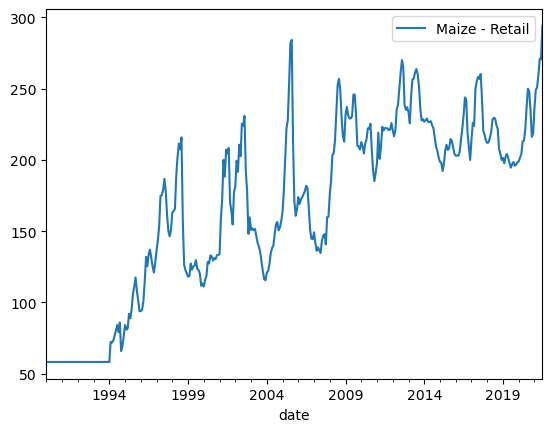

In [16]:
NE_prices_avg['Maize - Retail'].fillna(method='bfill', inplace=True)

NE_prices_avg.plot(x='date', y='Maize - Retail')

In [17]:
millet_ts = NE_prices_avg[['Millet - Retail', 'date']]
millet_ts.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

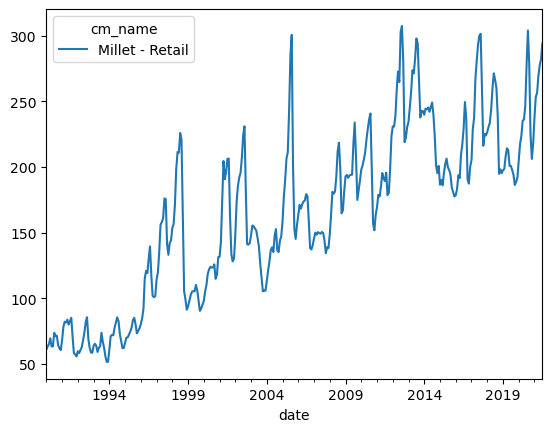

In [18]:
millet_ts.plot()

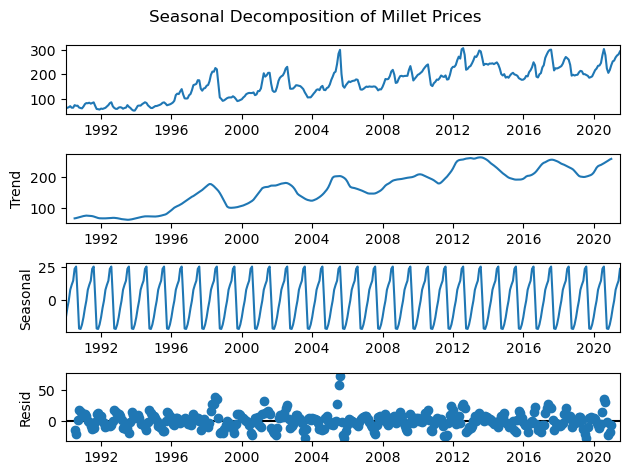

In [34]:
decomp = seasonal_decompose(millet_ts)
decomp.plot()
plt.suptitle('Seasonal Decomposition of Millet Prices')
plt.tight_layout()
plt.show()

c:\Users\William\anaconda3\envs\Springboard_Capstone_2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


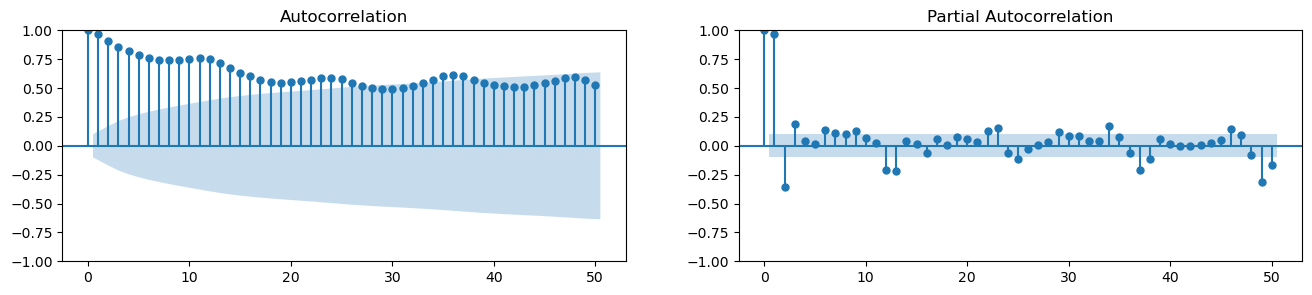

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,3))
plot_acf(millet_ts, lags=50, ax=ax[0])
plot_pacf(millet_ts, lags=50, ax=ax[1])
plt.show()

In [21]:
datapath = 'E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-2-Data/Niger_food_prices.csv'
NE_prices_avg.to_csv(datapath, index=False)

In [22]:
AF_prices = food_prices[food_prices['adm0_name']=='Afghanistan']
AF_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_name,pt_id,pt_name,um_id,um_name,mp_price,date,days
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-01-01,16071
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-02-01,16102
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-03-01,16130
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-04-01,16161
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,AFN,15,Retail,5,KG,50.0,2014-05-01,16191


In [23]:
AF_prices.cm_name.unique()

array(['Bread - Retail', 'Wheat - Retail', 'Rice (low quality) - Retail',
       'Wage (qualified labour) - Retail',
       'Livestock (sheep, one-year-old alive female) - Retail',
       'Fuel (diesel) - Retail', 'Exchange rate - Retail',
       'Wage (non-qualified labour, non-agricultural) - Retail',
       'Oil (cooking) - Retail', 'Sugar - Retail', 'Pulses - Retail',
       'Wheat flour (high quality) - Retail', 'Salt - Retail',
       'Rice (high quality) - Retail',
       'Wheat flour (low quality) - Retail', 'Wheat flour - Retail'],
      dtype=object)

In [24]:
AF_prices_avg = create_avg_cm_df(AF_prices)
AF_prices_avg.head()

cm_name,date,days,Bread - Retail,Wheat - Retail,Rice (low quality) - Retail,Wage (qualified labour) - Retail,"Livestock (sheep, one-year-old alive female) - Retail",Fuel (diesel) - Retail,Exchange rate - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Oil (cooking) - Retail,Sugar - Retail,Pulses - Retail,Wheat flour (high quality) - Retail,Salt - Retail,Rice (high quality) - Retail,Wheat flour (low quality) - Retail,Wheat flour - Retail
0,2000-01-01,10957.0,15.2500,12.2300,NaN,NaN,NaN,NaN,NaN,83124.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5450
1,2000-02-01,10988.0,15.3000,11.7475,NaN,NaN,NaN,NaN,NaN,85833.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.4275
2,2000-03-01,11017.0,14.7525,10.9300,NaN,NaN,NaN,25091.650000,NaN,82569.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1550
3,2000-04-01,11048.0,17.1950,13.1425,NaN,NaN,NaN,22223.133333,NaN,87722.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3450
4,2000-05-01,11078.0,18.2775,12.6475,NaN,NaN,1.214583e+06,22813.916667,NaN,89166.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2450


In [25]:
AF_prices_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   date                                                    259 non-null    datetime64[ns]
 1   days                                                    259 non-null    float64       
 2   Bread - Retail                                          258 non-null    float64       
 3   Wheat - Retail                                          258 non-null    float64       
 4   Rice (low quality) - Retail                             172 non-null    float64       
 5   Wage (qualified labour) - Retail                        85 non-null     float64       
 6   Livestock (sheep, one-year-old alive female) - Retail   32 non-null     float64       
 7   Fuel (diesel) - Retail                                  143 no

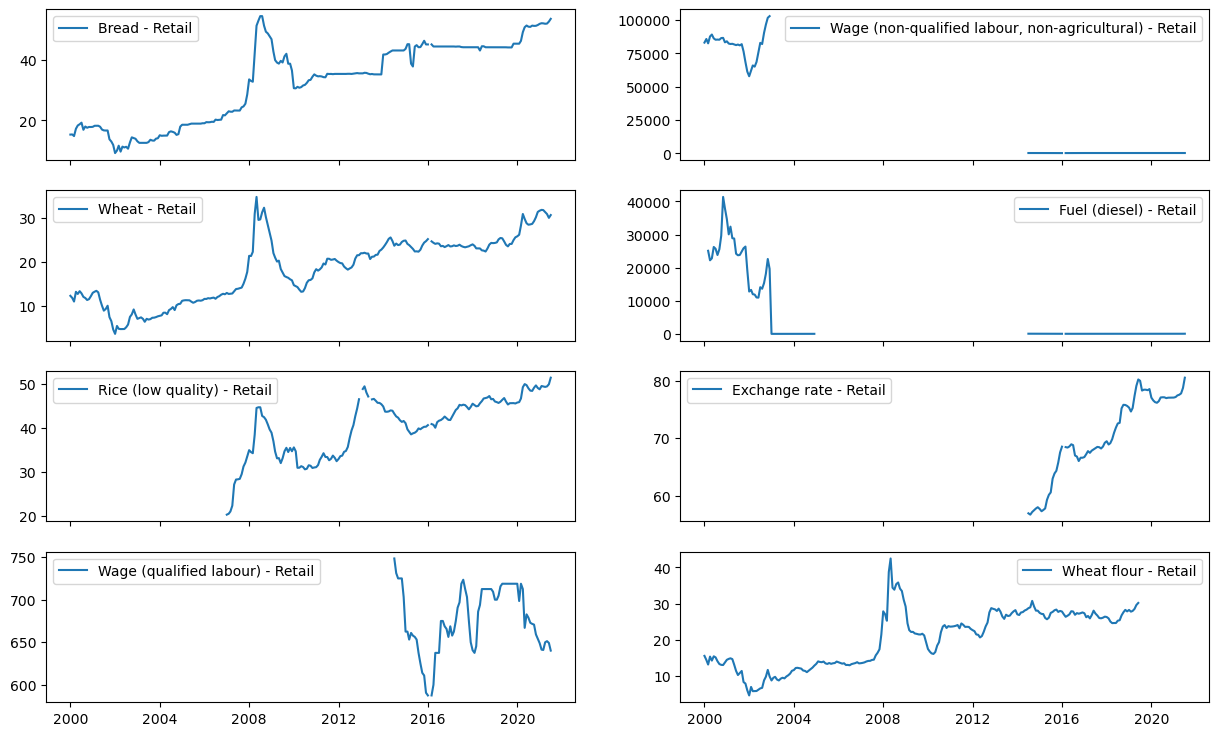

In [26]:
fig, ax = plt.subplots(4, 2, sharex=True)

fig.set_size_inches(15, 9)

ax[0,0].plot(AF_prices_avg.date, AF_prices_avg['Bread - Retail'], label='Bread - Retail')
ax[0,0].legend()
ax[1,0].plot(AF_prices_avg.date, AF_prices_avg['Wheat - Retail'], label='Wheat - Retail')
ax[1,0].legend()
ax[2,0].plot(AF_prices_avg.date, AF_prices_avg['Rice (low quality) - Retail'], label='Rice (low quality) - Retail')
ax[2,0].legend()
ax[3,0].plot(AF_prices_avg.date, AF_prices_avg['Wage (qualified labour) - Retail'], label='Wage (qualified labour) - Retail')
ax[3,0].legend()
ax[0,1].plot(AF_prices_avg.date, AF_prices_avg['Wage (non-qualified labour, non-agricultural) - Retail'], label='Wage (non-qualified labour, non-agricultural) - Retail')
ax[0,1].legend()
ax[1,1].plot(AF_prices_avg.date, AF_prices_avg['Fuel (diesel) - Retail'], label='Fuel (diesel) - Retail')
ax[1,1].legend()
ax[2,1].plot(AF_prices_avg.date, AF_prices_avg['Exchange rate - Retail'], label='Exchange rate - Retail')
ax[2,1].legend()
ax[3,1].plot(AF_prices_avg.date, AF_prices_avg['Wheat flour - Retail'], label='Wheat flour - Retail')
ax[3,1].legend()

plt.show()

<AxesSubplot:xlabel='date'>

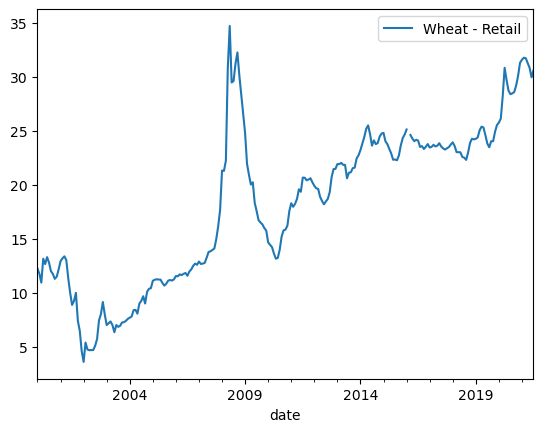

In [27]:
AF_prices_avg.plot(x='date', y='Wheat - Retail')

In [28]:
AF_prices_avg = AF_prices_avg[['date', 'days', 'Wheat - Retail']]
AF_prices_avg['Wheat - Retail'] = AF_prices_avg['Wheat - Retail'].interpolate(method='linear')
AF_prices_avg.head()

C:\Users\William\AppData\Local\Temp\ipykernel_11496\1180961931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AF_prices_avg['Wheat - Retail'] = AF_prices_avg['Wheat - Retail'].interpolate(method='linear')


cm_name,date,days,Wheat - Retail
0,2000-01-01,10957.0,12.2300
1,2000-02-01,10988.0,11.7475
2,2000-03-01,11017.0,10.9300
3,2000-04-01,11048.0,13.1425
4,2000-05-01,11078.0,12.6475


In [29]:
AF_prices_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            259 non-null    datetime64[ns]
 1   days            259 non-null    float64       
 2   Wheat - Retail  259 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.2 KB


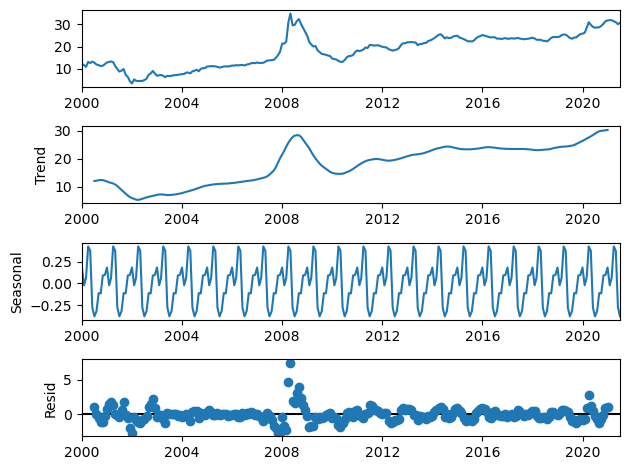

In [30]:
wheat_ts = AF_prices_avg[['Wheat - Retail', 'date']]
wheat_ts.set_index('date', inplace=True)
decomp = seasonal_decompose(wheat_ts)
decomp.plot()
plt.show()

In [31]:
datapath = 'E:/OtherCodeProjects/Springboard Capstone Projects/Springboard-Capstone-2-Data/Afghan_food_prices.csv'
AF_prices_avg.to_csv(datapath, index=False)